# Investigation into the effect of variables on heart disease presence 

## Reading in the data
- All packages required are imported
- The heart disease dataset is then read in

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


DF=pd.read_csv('/Users/emmacooper/Downloads/heart.csv')
DF.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Data organisation
The data is then organised to ensure that all categorical variables are classed as objects and all numerical variables are classed as integers. 'Oldpeak' variable is classed a float due to the data containing decimals.

In [2]:
Mis_features=['thal','ca','slope','exang','restecg','fbs','cp','sex']
DF[Mis_features] = DF[Mis_features].astype(object)

In [4]:
DF.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

## Initial data exploration
a superficial exploration of data is done. This looks at the 'Sex' and 'Target' variables and their relationships to each other.

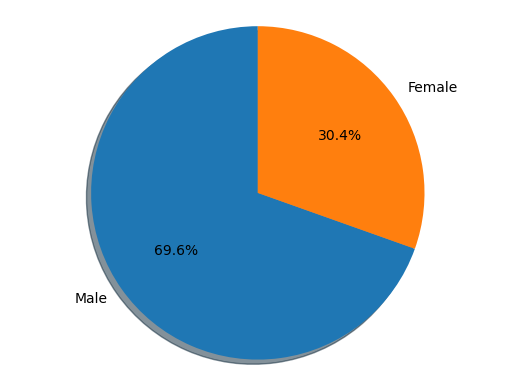

In [6]:
labels = 'Male', 'Female'
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(DF.sex.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

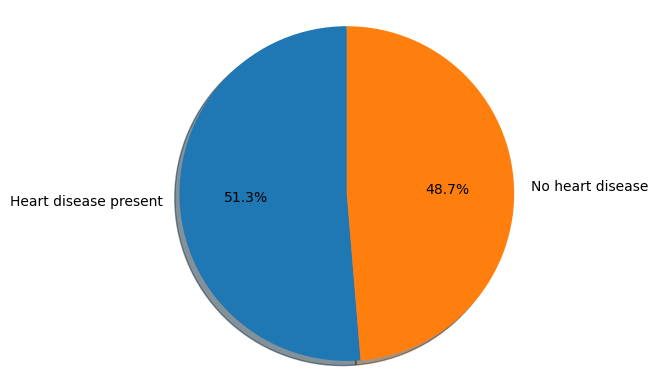

In [12]:
labels = "Heart disease present", "No heart disease"
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(DF.target.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

The variables of 'Sex' and 'Target' were then combined into into one graph to show their relationship to each other.

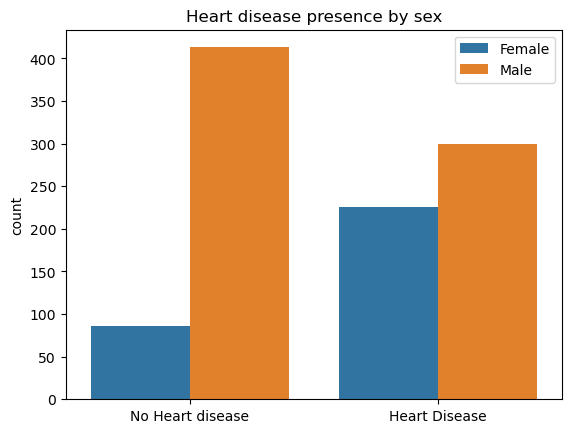

In [11]:
f = sns.countplot(x='target', data=DF, hue='sex')
plt.legend(['Female', 'Male'])
f.set_title("Heart disease presence by sex")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");

Finally in this intial exploration, the types of chest pain were explored. This shows that only individuals who experience typical angina are more likely to not have heart disease compared with other chest pain. 

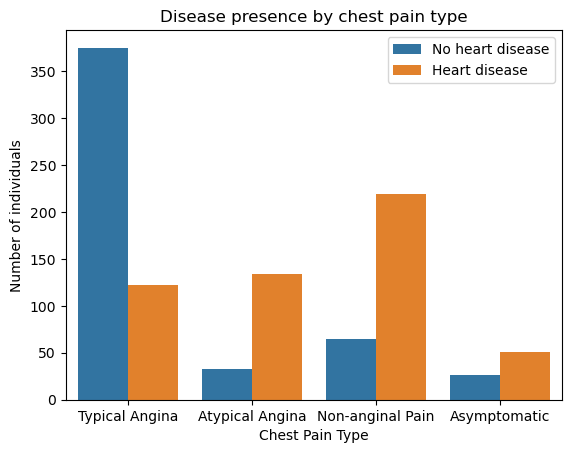

In [15]:
f = sns.countplot(x='cp', data=DF, hue='target')
f.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic']);
f.set_title('Disease presence by chest pain type')
plt.ylabel('Number of individuals')
plt.xlabel('Chest Pain Type')
plt.legend(['No heart disease', 'Heart disease']);

## Variable correlation
After intial investiagtion, each variable was then compared to each other to look for signficant correlations between variables. This was done using a correlation heat map and a multiple-variable scatter matrix.

The correlation heat map follows. Only numerical variables are included to show correlation. 

<AxesSubplot:>

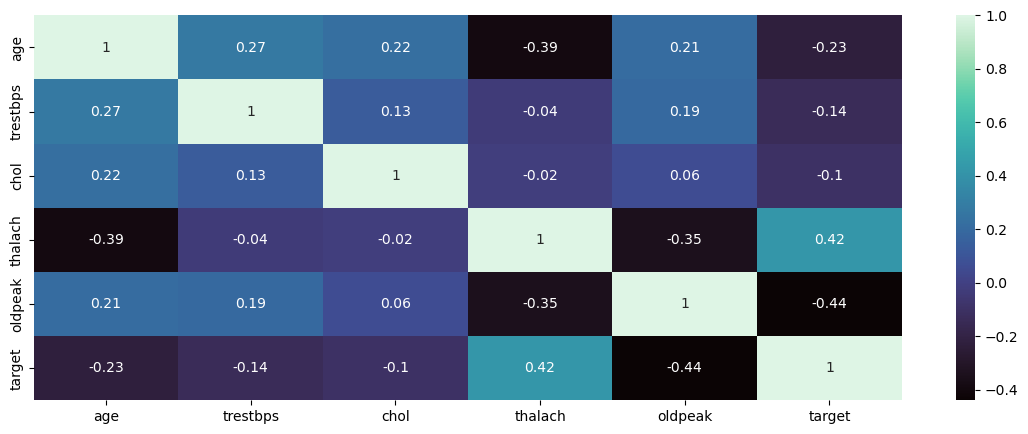

In [18]:
DF_corr= DF.corr()
plt.figure(figsize = (14,5))
sns.heatmap(round(DF_corr,2),annot=True,cmap = 'mako')

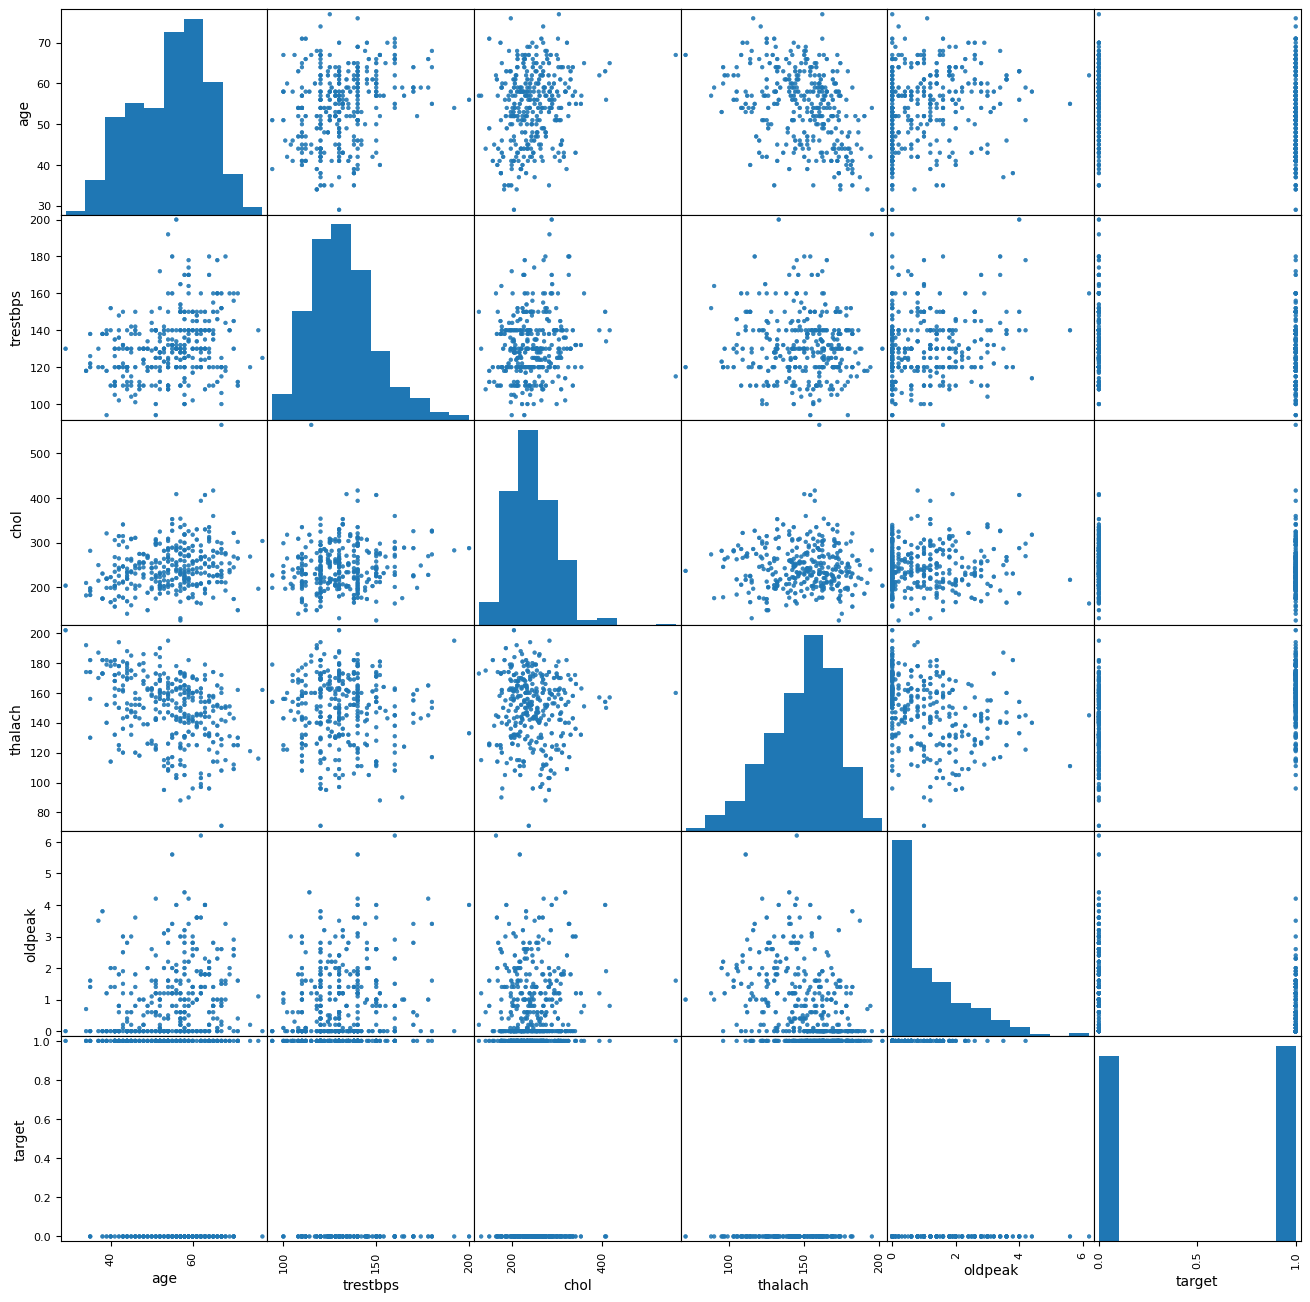

In [21]:
from pandas.plotting import scatter_matrix

scatter_matrix(DF, figsize=(16, 16))
plt.show()

After looking at the correlation plots above,it is clear that the variables 'Age' and 'Thalach' have a negative correlation. This relationship was then plotted considering heart disease status.

The heat also demonstrates that the variables 'oldpeak' and 'target'had a negative correaltion of -0.44. This relationship is also plotting below.

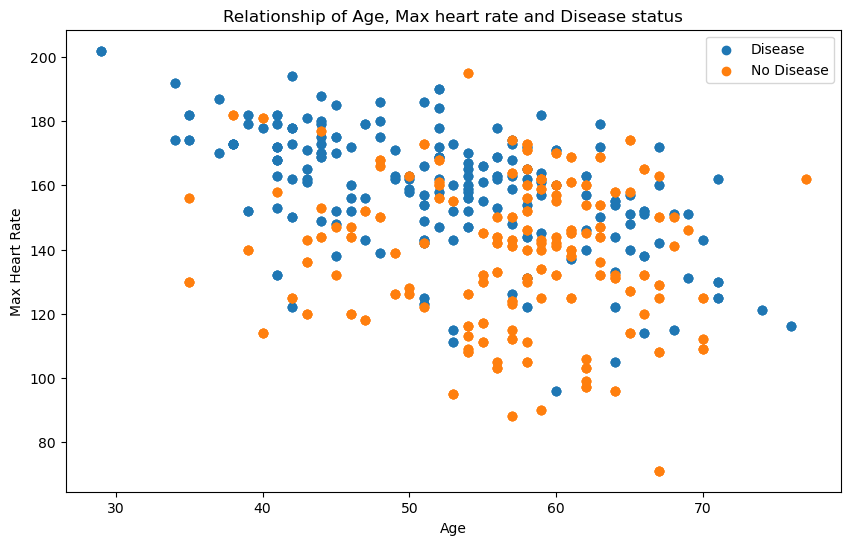

In [44]:
plt.figure(figsize=(10,6))

plt.scatter(DF.age[DF.target==1], 
            DF.thalach[DF.target==1])

plt.scatter(DF.age[DF.target==0], 
            DF.thalach[DF.target==0])

plt.title("Relationship of Age, Max heart rate and Disease status")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

Text(22.694444444444443, 0.5, 'ST depression')

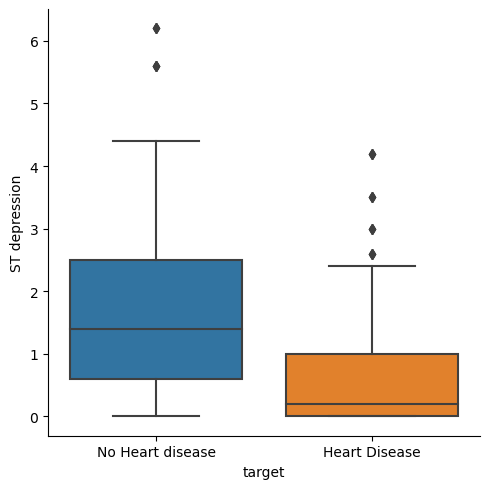

In [43]:
sns.catplot(data=DF, x="target", y="oldpeak", kind="box")
plt.xticks([0, 1], ['No Heart disease', 'Heart Disease'])
plt.ylabel('ST depression')

## Prediction model

Using this data, a model can be fitted that enables a prediction of whether an individual has heart disease through consideraton of their values of the variables. This model was fitted using a **logistic regression** as the outcome has two classifications (Heart disease/ No heart disease).

Initially, the data is organised into x variables (X) and the y variable (Y).


In [26]:
X = DF.drop(columns = 'target', axis = 1)
Y = DF['target']

In [30]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [31]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

The data must then be standardised so all values are converted to z-score values based on thier means and standard deviations.

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

The data is then randomly split into train and test data to ensure the accuracy of the model. The model is fit through data points allocated to the train set and and then its accuracy is tested using a data points from the test set. 

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y,random_state = 2)

The model is then trained and fitted...

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, Y_train)

LogisticRegression()

In [40]:
model_score=model.score(X_test, Y_test)
model_score

0.8048780487804879

**A model score of 0.80 indicates that the model produced will be able to successfully predict if an individual has Heart disease in 80% of cases.**

An example below demonstrates the models prediction after the input of an indivudal's variable values (row 3 within the data table was chosen). After fitted the model to the variable information provided it predicts that this individual does not have heart disease.

In [41]:
data = (61,1,0,148,203,0,1,161,0,0.9,2,1,3)
data_array = np.asarray(data)
data_reshape = data_array.reshape(1, -1)
data_standard = scaler.transform(data_reshape)
prediction = model.predict(data_standard)
if(prediction[0] == 1):
    print('Heart Disease')
else:
    print('No Heart Disease')

No Heart Disease


This reveals a powerful tool to be able to predict heart disease through measurable data. Machine learning provids the potential to further this to predict if an individual is likely to get Heart disease in the future, allowing them to change their lifestyle to prevent this. 
